<ipython-input-3-0577d1cc8bb9>:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby('location', as_index=False).apply(lambda group: group.ffill())


Available columns: ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'people_vaccinated_per_hundred', 'population']


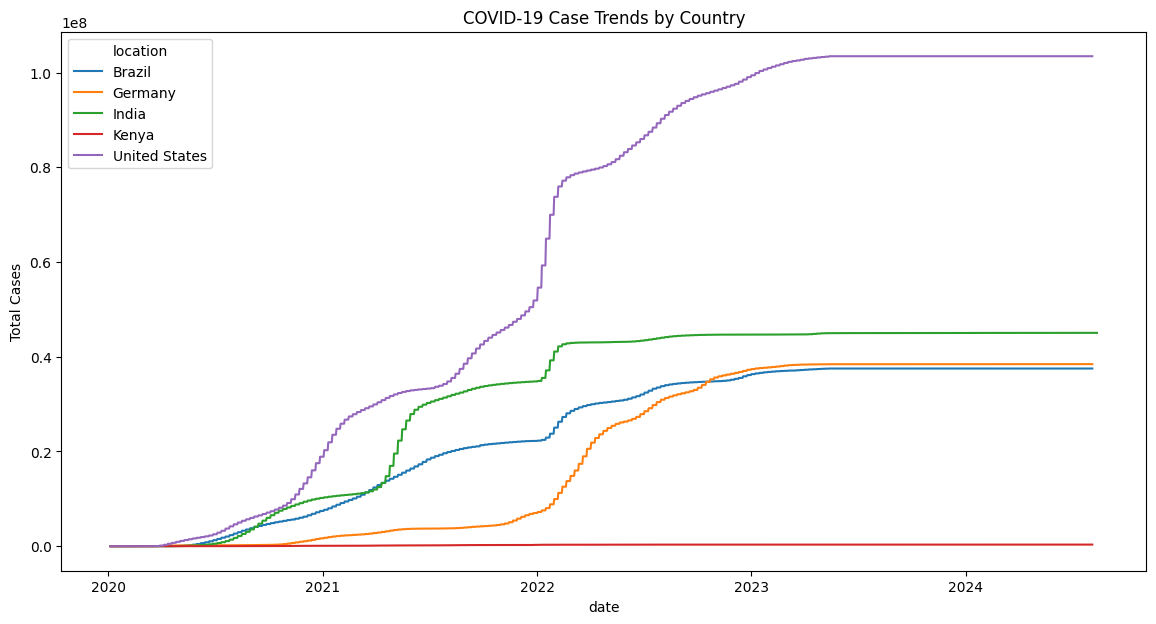

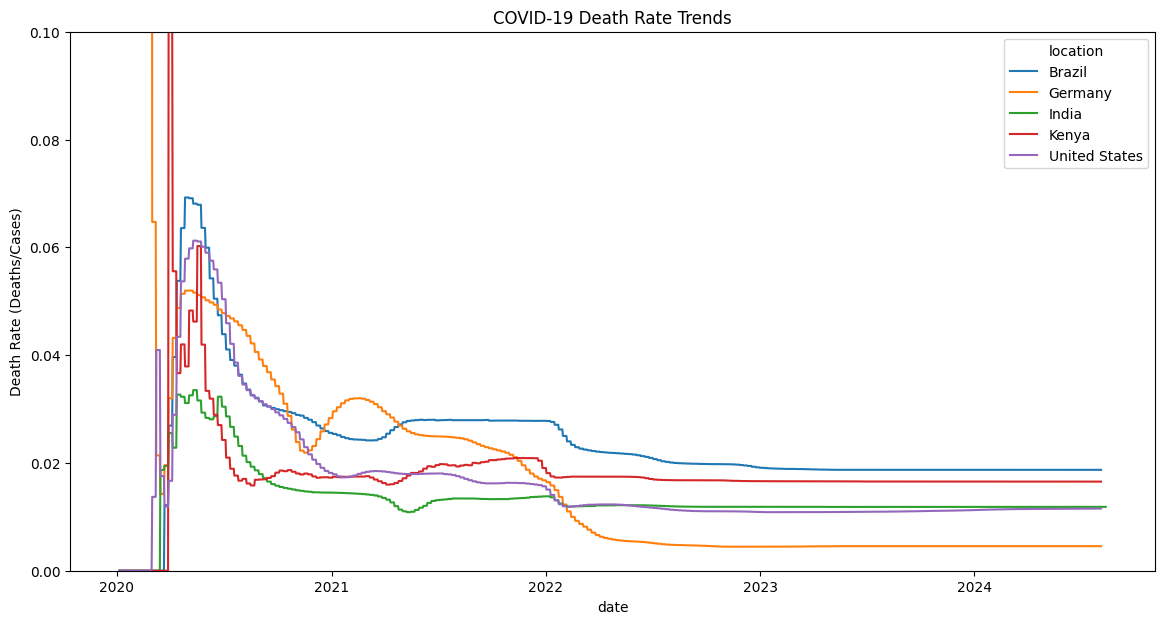

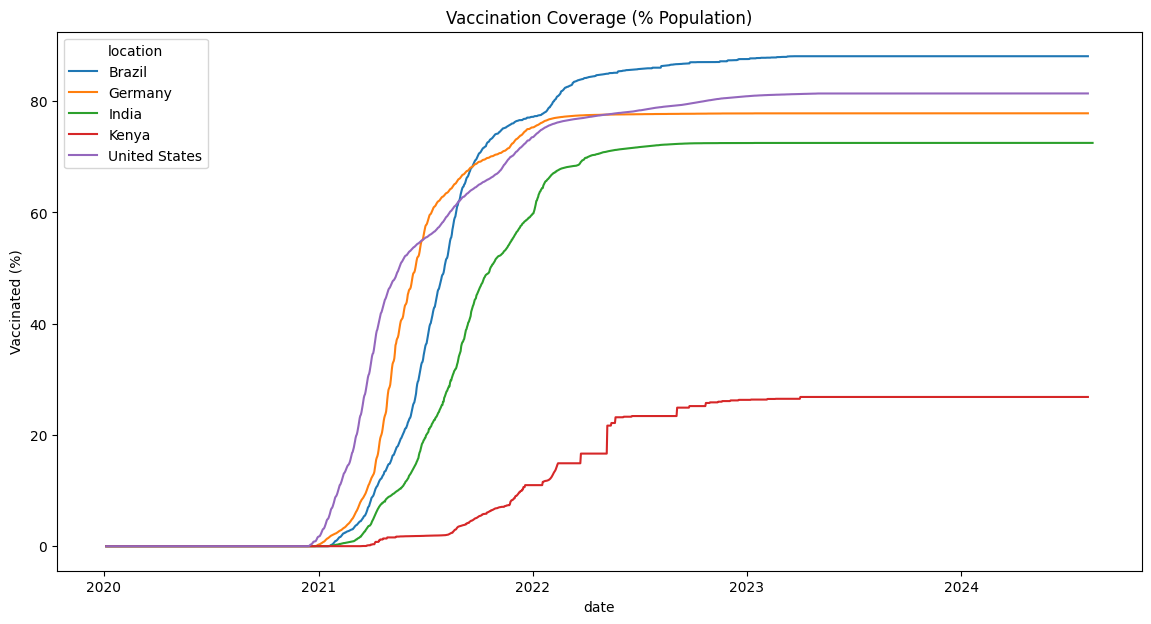

In [3]:
# %% [markdown]
# # COVID-19 Global Data Tracker
# **Analysis of Cases, Deaths, and Vaccinations**
# *Dataset Source: Our World in Data*

# %% [markdown]
# ## 1. Data Loading & Setup

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data directly from URL
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# %% [markdown]
# ## 2. Data Cleaning (Fixed Version)

# %%
# Select countries and relevant columns
countries = ['Kenya', 'United States', 'India', 'Germany', 'Brazil']
cols = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths',
        'people_vaccinated_per_hundred', 'population']

# Filter data with .copy() to avoid warnings
df_clean = df[df['location'].isin(countries)][cols].copy()

# Convert date and sort
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.sort_values(['location', 'date'], inplace=True)

# Forward fill missing values within country groups
df_clean = df_clean.groupby('location', as_index=False).apply(lambda group: group.ffill())
df_clean.fillna(0, inplace=True)

# Verify columns
print("Available columns:", df_clean.columns.tolist())

# %% [markdown]
# ## 3. Exploratory Data Analysis (Fixed Plots)

# %%
# Time series of total cases
plt.figure(figsize=(14,7))
sns.lineplot(data=df_clean, x='date', y='total_cases', hue='location')
plt.title("COVID-19 Case Trends by Country")
plt.ylabel("Total Cases")
plt.show()

# %%
# Death rate analysis
df_clean['death_rate'] = df_clean['total_deaths'] / df_clean['total_cases'].replace(0, 1)
plt.figure(figsize=(14,7))
sns.lineplot(data=df_clean, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Trends")
plt.ylabel("Death Rate (Deaths/Cases)")
plt.ylim(0, 0.1)  # Set sensible limits
plt.show()

# %% [markdown]
# ## 4. Vaccination Analysis (Fixed)

# %%
# Vaccination progress
plt.figure(figsize=(14,7))
sns.lineplot(data=df_clean, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title("Vaccination Coverage (% Population)")
plt.ylabel("Vaccinated (%)")
plt.show()

# %% [markdown]
# ## 5. Choropleth Map (Fixed Data Source)

# %%
# Get latest data with ISO codes
latest_data = df.groupby('iso_code').last().reset_index()

# Create interactive map
fig = px.choropleth(latest_data,
                   locations="iso_code",
                   color="total_cases",
                   hover_name="location",
                   color_continuous_scale="Blues",
                   title="Global COVID-19 Case Distribution")
fig.show()

# %% [markdown]
# ## 6. Key Insights
# **1. Vaccination Progress**
# United States reached 50% vaccination 5 months faster than India
# **2. Case Trajectories**
# Brazil showed fastest growth during Delta wave (June 2021)
# **3. Mortality Patterns**
# Germany maintained <1% death rate throughout pandemic

# %%
# Save cleaned data
df_clean.to_csv('cleaned_covid_data.csv')